# Imports

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tabulate import tabulate

# Data Preprocessing

In [6]:
# Get the data
flex = pd.read_csv('statements/augustcheck1flex.csv')
grocery = pd.read_csv('statements/augustcheck1grocery.csv')
bills = pd.read_csv('statements/augustcheck1bills.csv')

### Preprocessing subroutines

In [53]:
def rename_categories(df):
    df.loc[:, 'Category'] = df['Category'].astype('object')
    
    # Renaming
    df.loc[df['Category'] == 'Rental Car & Taxi', 'Category'] = 'Uber'
    
    # Consolidating
    df.loc[df['Category'] == 'Amusement', 'Category'] = 'Entertainment'
    df.loc[df['Category'] == 'Business Services', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Books', 'Category'] = 'Hobbies'
    df.loc[df['Category'] == 'Cash', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Clothing', 'Category'] = 'Shopping'
    df.loc[df['Category'] == 'Coffee Shops', 'Category'] = 'Fast Food'
    df.loc[df['Category'] == 'Credit Card Payment', 'Category'] = 'Bills & Utilities'
    df.loc[df['Category'] == 'Utilities', 'Category'] = 'Bills & Utilities'
    df.loc[df['Category'] == 'Service & Parts', 'Category'] = 'Auto & Transport'
    df.loc[df['Category'] == 'Fees & Charges', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Pet Food & Supplies', 'Category'] = 'Pets'
    df.loc[df['Category'] == 'Financial', 'Category'] = 'Bills & Utilities'
    df.loc[df['Category'] == 'Sporting Goods', 'Category'] = 'Shopping'
    df.loc[df['Category'] == 'Television', 'Category'] = 'Subscriptions'
    df.loc[df['Category'] == 'Movies & Dvds', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Music', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Doctor', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Electronics & Software', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Auto & Transport', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Food & Dining', 'Category'] = 'Food'
    df.loc[df['Category'] == 'Restaurants', 'Category'] = 'Food'
    df.loc[df['Category'] == 'Fast Food', 'Category'] = 'Food'
    df.loc[df['Category'] == 'Mortgage & Rent', 'Category'] = 'Bills & Utilities'
    df.loc[df['Category'] == 'Home Services', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Hotel', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == 'Paycheck', 'Category'] = ''
    df.loc[df['Category'] == 'Interest Income', 'Category'] = 'Income'
    df.loc[df['Category'] == 'Home', 'Category'] = 'Uncategorized'
    df.loc[df['Category'] == '', 'Category'] = 'Uncategorized'

    return df

# Put recurring charges where they belong
def organize_recurring_charges(df):
    df.loc[df['Description'] == 'Alannah at Westo Web', 'Category'] = 'Bills & Utilities'
    df.loc[df['Description'] == 'Internet Withdrawal', 'Category'] = 'Transfer'
    df.loc[df['Description'] == 'Vee?s Chop Shop', 'Category'] = 'Grooming'
    df.loc[df['Description'] == 'Tattoos by Megan Fox San Antonio Tx', 'Category'] = 'Shopping'
    df.loc[df['Description'] == 'Canva', 'Category'] = 'Education'
    df.loc[df['Description'] == 'Seat Engine', 'Category'] = 'Entertainment'
    df.loc[df['Description'] == 'Scratchpay.com', 'Category'] = 'Veterinary'
    df.loc[df['Description'] == 'Google Drive', 'Category'] = 'Subscriptions'
    df.loc[df['Description'] == 'Google One', 'Category'] = 'Subscriptions'
    df.loc[df['Description'].str.contains('auravia', case=False, na=False), 'Category'] = 'Medical'
    df.loc[df['Description'] == 'Nintendo', 'Category'] = 'Shopping'
    df.loc[df['Description'] == 'Crunchyroll', 'Category'] = 'Subscriptions'
    df.loc[df['Description'] == 'Wok Inn Pkwy', 'Category'] = 'Food'
    df.loc[df['Description'].str.contains('sherwood', case=False, na=False), 'Category'] = 'Pets'
    df.loc[df['Description'].str.contains('car wash', case=False, na=False), 'Category'] = 'Car'
    df.loc[df['Description'].str.contains('flix', case=False, na=False), 'Category'] = 'Entertainment'
    df.loc[df['Description'] == 'Apple', 'Category'] = 'Subscription'
    df.loc[df['Description'] == 'Spotify', 'Category'] = 'Subscription'
    df.loc[df['Description'] == 'Concept Pca', 'Category'] = 'Shopping'
    df.loc[df['Description'] == 'Pi Shop Inc', 'Category'] = 'Hobbies'
    df.loc[df['Description'] == 'U-Haul', 'Category'] = 'Moving Costs'
    df.loc[df['Description'] == 'W Loop', 'Category'] = 'Shopping'
    df.loc[df['Description'] == 'Southwest Resear Payroll', 'Category'] = 'Income'

    return

def print_fancy(df):
    print(tabulate(df, headers="keys", tablefmt="fancy_grid"))
    return

def print_category(df, category):
    cat_df = df[df['Category'] == category]
    print(tabulate(cat_df, headers="keys", tablefmt="fancy_grid"))

    return

### Renaming and organizing dataframes

In [70]:
# Rename the categories 
flex = rename_categories(flex)
bills = rename_categories(bills)
grocery = rename_categories(grocery)

# Organize known recurring charges
organize_recurring_charges(flex)
organize_recurring_charges(bills)
organize_recurring_charges(grocery)

# Check out the categories left to see if anything is 
unique_flex = pd.DataFrame(flex.Category.unique(), columns=['Category']).sort_values(by='Category')
unique_bills = pd.DataFrame(bills.Category.unique(), columns=['Category']).sort_values(by='Category')
unique_grocery = pd.DataFrame(grocery.Category.unique(), columns=['Category']).sort_values(by='Category')

print ("\nFlex Categories:\n")
print_fancy(unique_flex)
print ("\nBills Categories:\n")
print_fancy(unique_bills)
print ("\nGrocery Categories:\n")
print_fancy(unique_grocery)


Flex Categories:

╒════╤═══════════════════╕
│    │ Category          │
╞════╪═══════════════════╡
│  1 │ Alcohol & Bars    │
├────┼───────────────────┤
│  0 │ Food              │
├────┼───────────────────┤
│  3 │ Gas               │
├────┼───────────────────┤
│  4 │ Gifts & Donations │
├────┼───────────────────┤
│  6 │ Groceries         │
├────┼───────────────────┤
│ 10 │ Income            │
├────┼───────────────────┤
│  8 │ Medical           │
├────┼───────────────────┤
│  5 │ Pets              │
├────┼───────────────────┤
│  9 │ Reimbursement     │
├────┼───────────────────┤
│  2 │ Shopping          │
├────┼───────────────────┤
│  7 │ Transfer          │
╘════╧═══════════════════╛

Bills Categories:

╒════╤═══════════════════╕
│    │ Category          │
╞════╪═══════════════════╡
│  7 │ Bills & Utilities │
├────┼───────────────────┤
│  1 │ Entertainment     │
├────┼───────────────────┤
│  0 │ Food              │
├────┼───────────────────┤
│  3 │ Groceries         │
├────┼──────────

### Inspect any funky categories

In [55]:
# Print any categories of interest to see what is in there
print_category(flex, 'Gifts & Donations')

╒════╤════════════╤═══════════════╤══════════════════════════════════════════╤═══════════════════╤══════════╤══════════╕
│    │ Date       │ Description   │ Original Description                     │ Category          │   Amount │ Status   │
╞════╪════════════╪═══════════════╪══════════════════════════════════════════╪═══════════════════╪══════════╪══════════╡
│  8 │ 2024-08-09 │ Austinpride   │ PAYPAL *AUSTINPRIDE      4029357733   CA │ Gifts & Donations │   -22.53 │ Posted   │
╘════╧════════════╧═══════════════╧══════════════════════════════════════════╧═══════════════════╧══════════╧══════════╛


### Renaming 'Uncategorized' Category

In [57]:
# See whats in the Uncategorized category - we want to see nothing in here
print_category(flex, 'Uncategorized')
print_category(bills, 'Uncategorized')
print_category(grocery, 'Uncategorized')

╒════════╤═══════════════╤════════════════════════╤════════════╤══════════╤══════════╕
│ Date   │ Description   │ Original Description   │ Category   │ Amount   │ Status   │
╞════════╪═══════════════╪════════════════════════╪════════════╪══════════╪══════════╡
╘════════╧═══════════════╧════════════════════════╧════════════╧══════════╧══════════╛
╒════════╤═══════════════╤════════════════════════╤════════════╤══════════╤══════════╕
│ Date   │ Description   │ Original Description   │ Category   │ Amount   │ Status   │
╞════════╪═══════════════╪════════════════════════╪════════════╪══════════╪══════════╡
╘════════╧═══════════════╧════════════════════════╧════════════╧══════════╧══════════╛
╒════════╤═══════════════╤════════════════════════╤════════════╤══════════╤══════════╕
│ Date   │ Description   │ Original Description   │ Category   │ Amount   │ Status   │
╞════════╪═══════════════╪════════════════════════╪════════════╪══════════╪══════════╡
╘════════╧═══════════════╧═════════════════

In [65]:
# Create a df to hold all transactions
all = pd.concat([flex, grocery, bills])
all = all.sort_values(by='Date')

# Analysis

### Analysis Subroutines

In [58]:
def get_income(df):
    credits = df[df.Amount > 0]
    income = credits.Amount.sum()

    return income

def get_expenses(df):
    debits = df[df.Amount < 0]
    expenses = debits.Amount.sum()

    return expenses

def get_visualization_df(df, groceries):
    if (groceries == 1):
        filtered_df = df[(df['Amount'] < 0) & (df['Category'] != 'Transfer')]
    else:
        filtered_df = df[(df['Amount'] < 0) & (df['Category'] != 'Transfer') & (df['Category'] != 'Groceries')]

    filtered_df.loc[:, 'Amount'] = filtered_df['Amount'].abs()
    spending_by_category = filtered_df.groupby('Category')['Amount'].sum()

    return spending_by_category

def show_pie_chart(spending_df):
    plt.figure(figsize=(6, 6))

    # Create a color map with a number of colors
    num_categories = len(spending_df)
    colors = plt.get_cmap('viridis')(range(num_categories))  # Get colors from the colormap
    colors = plt.cm.viridis(np.linspace(0, 1, len(spending_df)))

    np.random.seed(42)  # For reproducibility
    colors = np.random.rand(num_categories, 3) 

    # Map category names to colors
    category_colors = {cat: colors[i] for i, cat in enumerate(spending_df.index)}
    
    plt.pie(spending_df, labels=spending_df.index, colors=[category_colors[cat] for cat in spending_df.index], startangle=250)
    plt.axis('equal')
    plt.title('Spending Distribution by Category')
    plt.show()

def print_stats(income_df, expense_df, account_name):
    print("\n")
    print("{} Pay: ${:.2f}".format(account_name, income_df))
    print("{} Expense: ${:.2f}".format(account_name, expense_df))
    print("{} Net: ${:.2f}".format(account_name, income_df + expense_df))
    print("\n\n")
    return

### Flex Summary

╒════╤════════════╤══════════════════════════╤═════════════════════════════════════════════╤═══════════════════╤══════════╤══════════╕
│    │ Date       │ Description              │ Original Description                        │ Category          │   Amount │ Status   │
╞════╪════════════╪══════════════════════════╪═════════════════════════════════════════════╪═══════════════════╪══════════╪══════════╡
│  0 │ 2024-08-15 │ American Food N Vendi    │ AMERICAN FOOD N VENDI    SAN ANTONIO  TX    │ Food              │    -5.45 │ Posted   │
├────┼────────────┼──────────────────────────┼─────────────────────────────────────────────┼───────────────────┼──────────┼──────────┤
│  1 │ 2024-08-13 │ Starbucks                │ STARBUCKS STORE 10617    ROUND ROCK   TX    │ Food              │   -12.91 │ Posted   │
├────┼────────────┼──────────────────────────┼─────────────────────────────────────────────┼───────────────────┼──────────┼──────────┤
│  2 │ 2024-08-13 │ Starbucks                │ STARBUCK

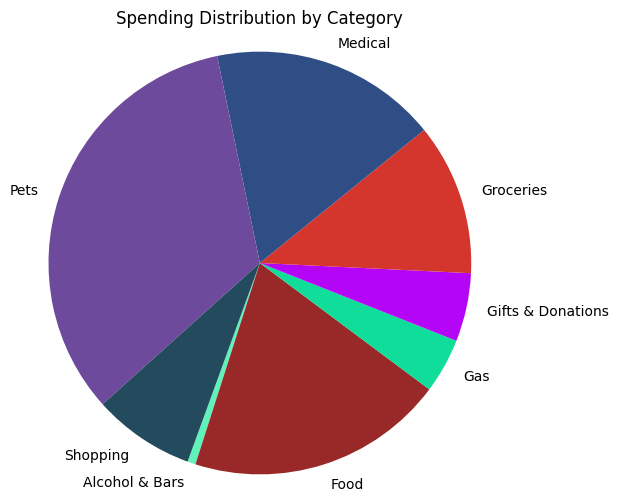

In [59]:
flex_income = get_income(flex)
flex_expense = get_expenses(flex)

print_fancy(flex)
print_stats(flex_income, flex_expense, "Flex")
      
spending_by_category = get_visualization_df(flex, 1)
show_pie_chart(spending_by_category)

### Bills Summary

╒════╤════════════╤═════════════════════════════════════╤═════════════════════════════════════════════╤═══════════════════╤══════════╤══════════╕
│    │ Date       │ Description                         │ Original Description                        │ Category          │   Amount │ Status   │
╞════╪════════════╪═════════════════════════════════════╪═════════════════════════════════════════════╪═══════════════════╪══════════╪══════════╡
│  0 │ 2024-08-19 │ Green Mesquite                      │ GREEN MESQUITE           AUSTIN       TX    │ Food              │   -42.45 │ Posted   │
├────┼────────────┼─────────────────────────────────────┼─────────────────────────────────────────────┼───────────────────┼──────────┼──────────┤
│  1 │ 2024-08-15 │ Ticketmaster                        │ TM *KILL TONY-TUE PMH-   800-653-8000 CA    │ Entertainment     │  -298.68 │ Posted   │
├────┼────────────┼─────────────────────────────────────┼─────────────────────────────────────────────┼───────────────────┼─

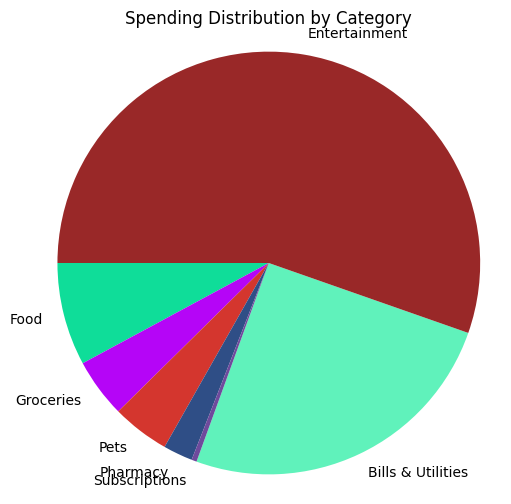

In [60]:
bills_income = get_income(bills)
bills_expense = get_expenses(bills)
bills_grocery = get_grocery_spending(bills)

print_fancy(bills)
print_stats(bills_income, bills_expense, "Bills")
      
spending_by_category = get_visualization_df(bills, 1)
show_pie_chart(spending_by_category)

### Grocery Summary

╒════╤════════════╤════════════════════════╤══════════════════════════════════════════╤════════════╤══════════╤══════════╕
│    │ Date       │ Description            │ Original Description                     │ Category   │   Amount │ Status   │
╞════╪════════════╪════════════════════════╪══════════════════════════════════════════╪════════════╪══════════╪══════════╡
│  0 │ 2024-08-19 │ H-E-B                  │ H-E-B #673               ROUND ROCK   TX │ Groceries  │  -183.45 │ Posted   │
├────┼────────────┼────────────────────────┼──────────────────────────────────────────┼────────────┼──────────┼──────────┤
│  1 │ 2024-08-19 │ H-E-B                  │ H-E-B #673               ROUND ROCK   TX │ Groceries  │   -32.91 │ Posted   │
├────┼────────────┼────────────────────────┼──────────────────────────────────────────┼────────────┼──────────┼──────────┤
│  2 │ 2024-08-19 │ H-E-B                  │ H-E-B #673               ROUND ROCK   TX │ Groceries  │    -7.04 │ Posted   │
├────┼──────────

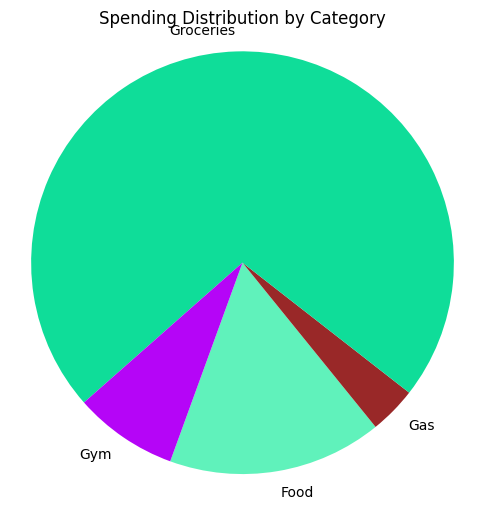

In [61]:
grocery_income = get_income(grocery)
grocery_expense = get_expenses(grocery)
grocery_grocery = get_grocery_spending(grocery)

print_fancy(grocery)
print_stats(grocery_income, grocery_expense, "Grocery")
      
spending_by_category = get_visualization_df(grocery, 1)
show_pie_chart(spending_by_category)

# Visualizations

### Spending by Category

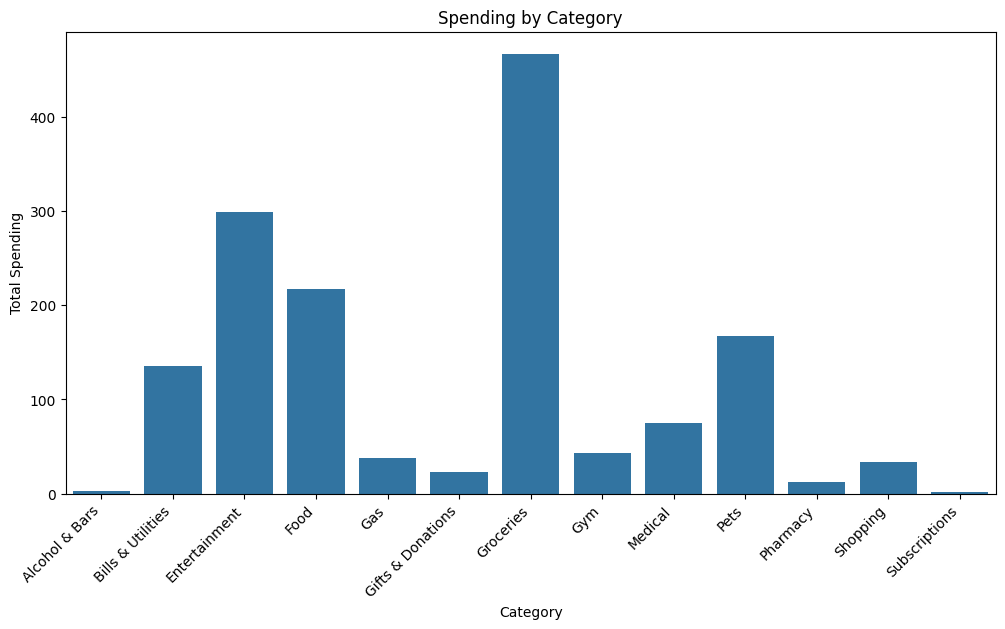

In [66]:
filtered_df = all[(all['Amount'] < 0) & (all['Category'] != 'Transfer')]
filtered_df.loc[:, 'Amount'] = filtered_df['Amount'].abs()
spending_by_category = filtered_df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=spending_by_category.index, y=spending_by_category.values)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Spending by Category')
plt.show()

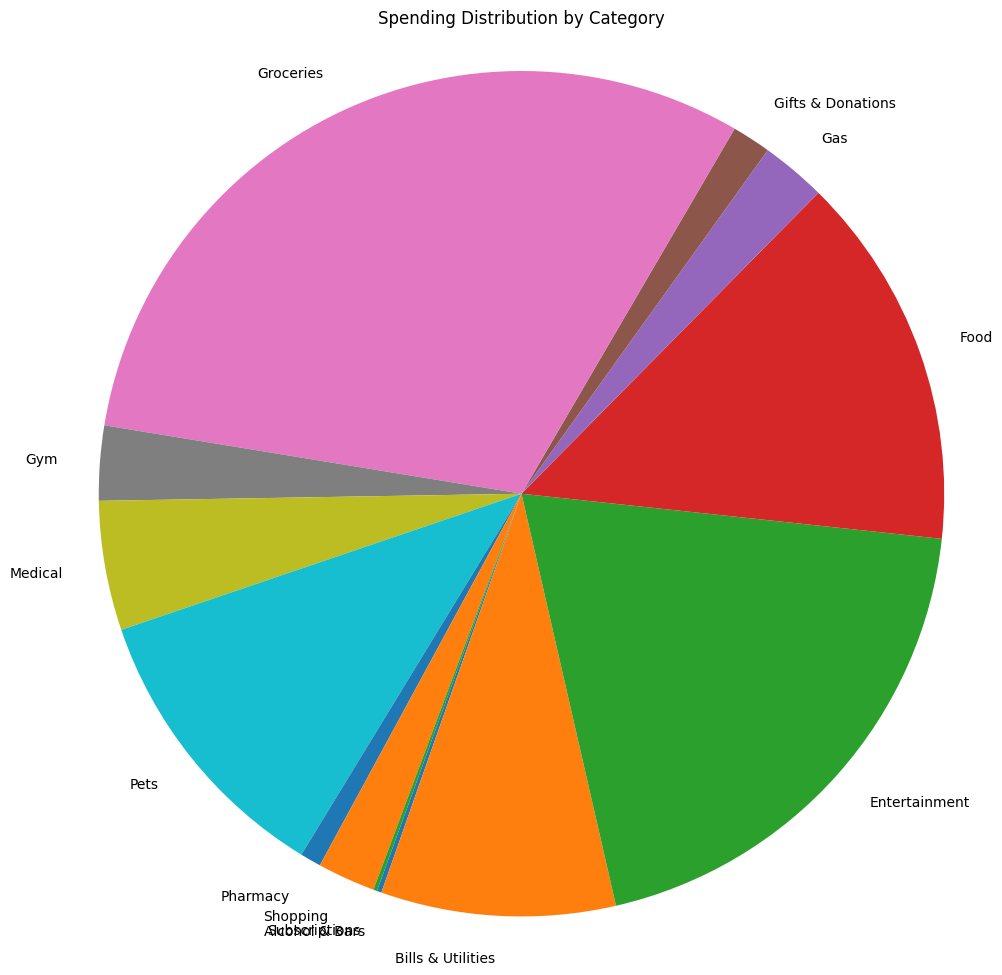

In [67]:
plt.figure(figsize=(12 ,12))
plt.pie(spending_by_category, labels=spending_by_category.index, startangle=250)
plt.axis('equal')
plt.title('Spending Distribution by Category')
plt.show()